In [235]:
# Import the libraries
import pandas as pd
import numpy as np

In [236]:
# import the data
data = pd.read_csv('../Data/spam.csv', encoding_errors='ignore')
df = data.copy()

Checking the data

In [237]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4466,ham,"She said,'' do u mind if I go into the bedroom...",NaN,NaN,NaN
794,ham,There generally isn't one. It's an uncountable...,NaN,NaN,NaN
524,spam,"URGENT!: Your Mobile No. was awarded a 2,000 B...",NaN,NaN,NaN
3439,ham,What time you thinkin of goin?,NaN,NaN,NaN
5530,ham,I think that tantrum's finished so yeah I'll b...,NaN,NaN,NaN


In [238]:
df.shape

(5572, 5)

# Data Cleaning

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [240]:
# Let's drop the Unnamed column as they don't have major data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [241]:
df.sample(5)

,v1,v2
2221,ham,I notice you like looking in the shit mirror y...
742,ham,Just got up. have to be out of the room very s...
1503,ham,Ill be there on &lt;#&gt; ok.
3301,ham,Stop calling everyone saying I might have canc...
4639,ham,Do you hide anythiing or keeping distance from me


In [242]:
# Renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [243]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [244]:
# Let's label encode the target column to have binary output of 1(Spam) and 0(Not Spam)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [245]:
df['target'] = encoder.fit_transform(df['target'])

In [246]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [247]:
# Check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [248]:
# Check for duplicate values
df.duplicated().sum()

404

In [249]:
# Let's remove the duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [250]:
df.duplicated().sum()

0

In [251]:
df.shape

(5168, 2)

# EDA

In [252]:
# Check data for imbalance
df['target'].value_counts()

0    4516
1     652
Name: target, dtype: int64

In [253]:
import matplotlib.pyplot as plt

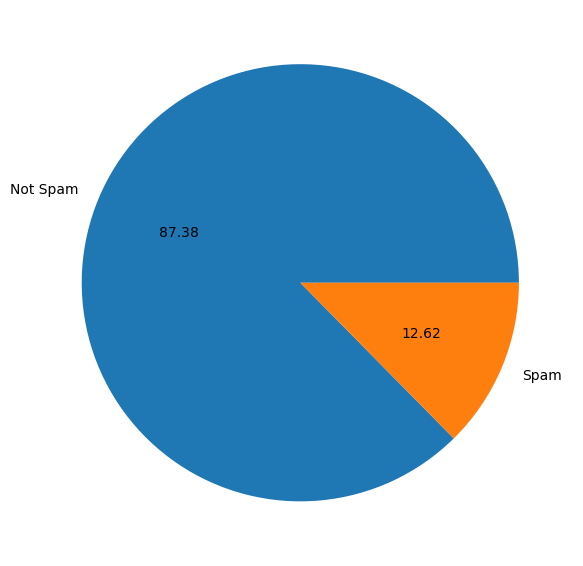

In [254]:
plt.figure(figsize=(6, 6))
plt.pie(df['target'].value_counts(), labels=['Not Spam', 'Spam'], autopct='%0.2f')
plt.tight_layout()
plt.show()

# Data is imbalanced

In [255]:
import nltk

In [256]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [257]:
# Make a new feature with number of characters counts
df['num_chars'] = df['text'].apply(len)

In [258]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [259]:
# Make another feature with number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [260]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [261]:
# Make another feature with number of sentences
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [262]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [263]:
df.iloc[:, [2, 3, 4]].describe()

,num_chars,num_words,num_sent
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.438661,1.947949
std,58.104099,13.327619,1.363277
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [264]:
# Let's check the basic info of both spam and not spam separately

In [265]:
# Not spam
df[df['target'] == 0].iloc[:, [2, 3, 4]].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.106067,1.799380
std,56.328803,13.494482,1.277997
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [266]:
# Spam
df[df['target'] == 1].iloc[:, [2, 3, 4]].describe()

,num_chars,num_words,num_sent
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.976994
std,29.937352,7.015283,1.486578
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,8.000000


In [267]:
# Let's plot and see
import seaborn as sns

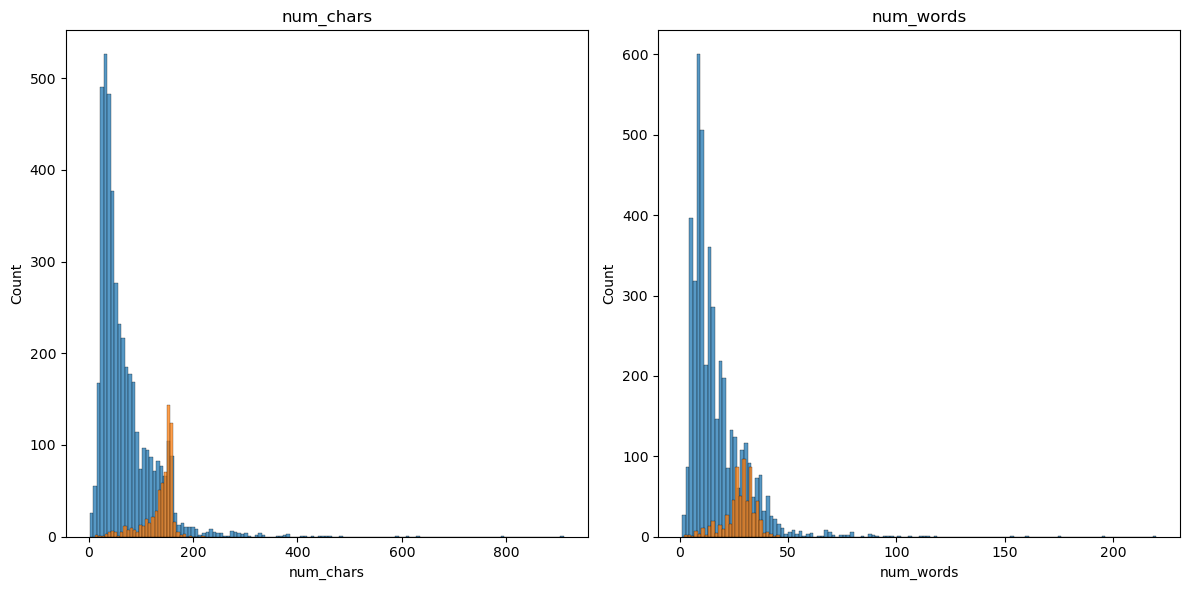

In [268]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

variables = ['num_chars', 'num_words']

# Create histograms for each variable in subplots
for variable, ax in zip(variables, axes.flatten()):
    sns.histplot(data=df[df['target'] == 0], x=variable, ax=ax)
    sns.histplot(data=df[df['target'] == 1], x=variable, ax=ax)
    ax.set_title(variable)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

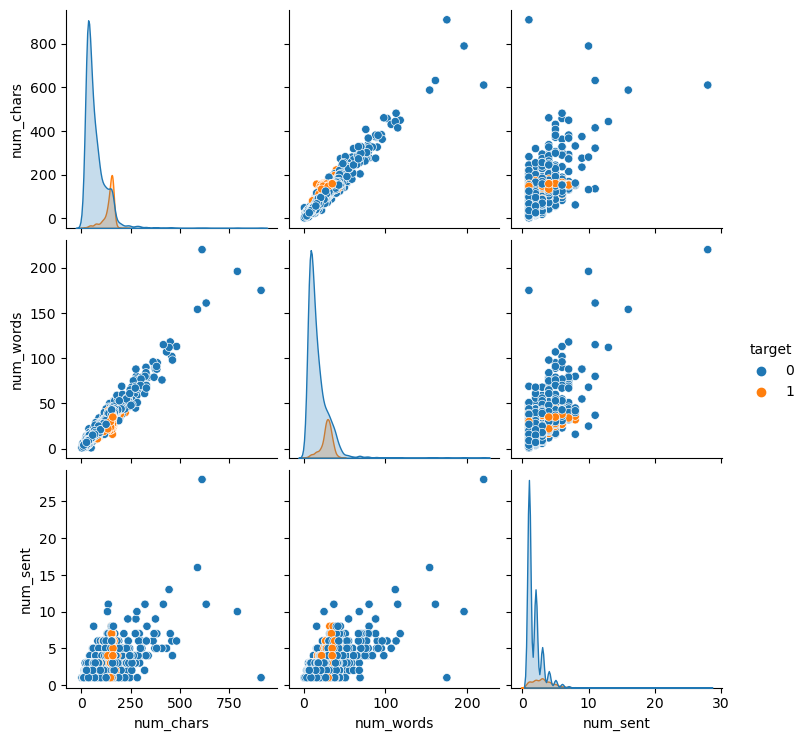

In [269]:
# Relationship between the features
sns.pairplot(df, hue='target')

<Axes: >

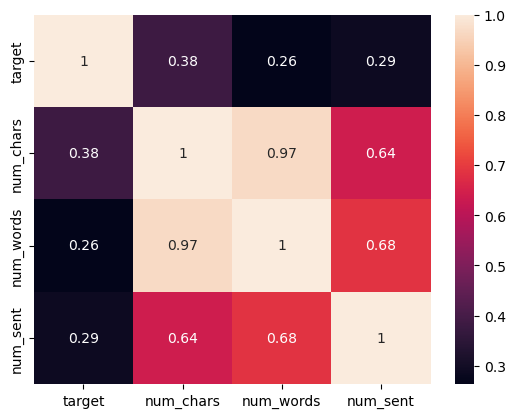

In [270]:
# Corelation
sns.heatmap(df.corr(numeric_only=True), annot=True)

# There is a strong corealtion between all the columns

# Data Preprocessing

In [273]:
# Function to convert all the textual data into lower case, remove punctuation & stopwords
# Using nltk stemmer to covert all similar words

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

def transform_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    text_d1 = []
    
    # Removing all non alpha numeric characters
    for i in text:
        if i.isalnum():
            text_d1.append(i)
            
    text_d2 = text_d1[:]
    text_d1.clear()
    
    # Remove punctuation and stopwords 
    for i in text_d2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text_d1.append(i)
            
    text_d2 = text_d1[:]
    text_d1.clear()
    
    # Covert all similar words to base form
    for i in text_d2:
        text_d1.append(ps.stem(i))
        
    return " ".join(text_d1)

In [274]:
# Convert the text columns
df['transformed_text'] = df['text'].apply(transform_text)

In [275]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [276]:
print(df['text'].dtype)

object


In [277]:
# Let's see the most used word with word cloud
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="black")

In [278]:
# Spam
span_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

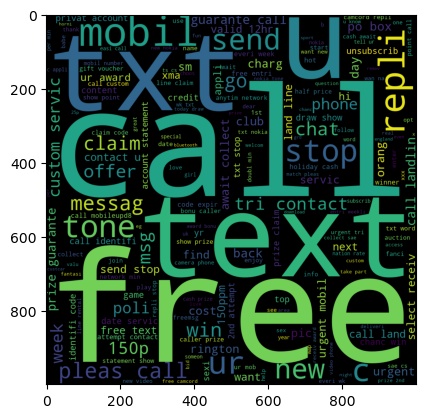

In [279]:
plt.imshow(span_wc)

In [282]:
# Not spam
not_spam = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

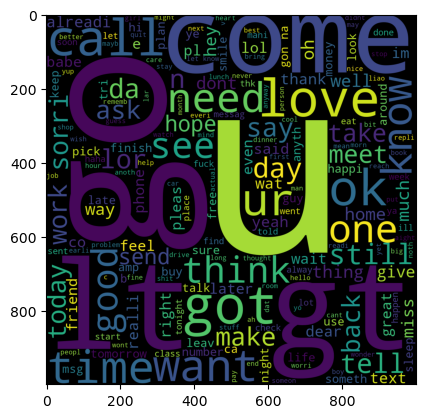

In [283]:
plt.imshow(not_spam)

In [285]:
# Let's see the top words used in spam and not spam

# spam
spam = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)

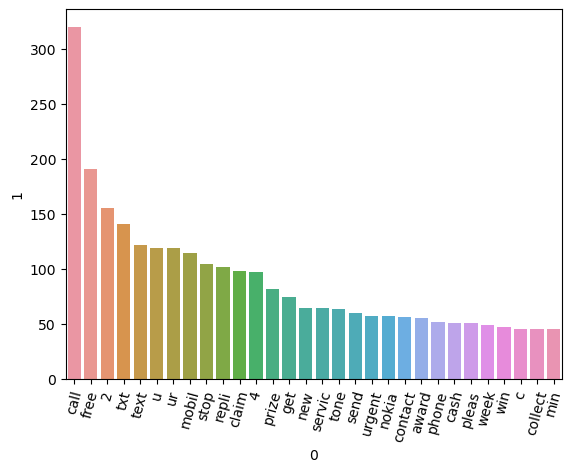

In [304]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam).most_common(30))[0], y=pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation=75)
plt.show()

In [306]:
# Not spam
not_spam = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam.append(word)

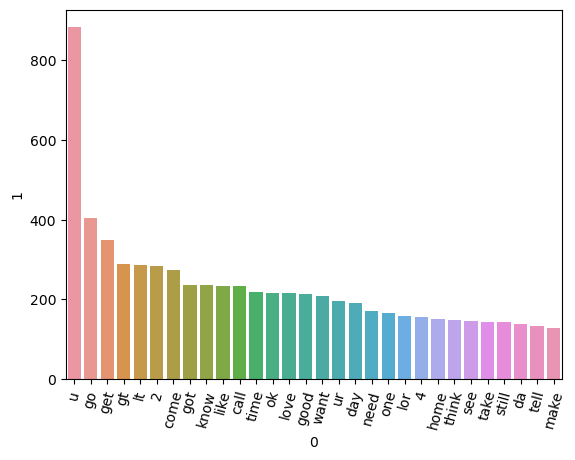

In [307]:
sns.barplot(x=pd.DataFrame(Counter(not_spam).most_common(30))[0], y=pd.DataFrame(Counter(not_spam).most_common(30))[1])
plt.xticks(rotation=75)
plt.show()

# Model Building

In [337]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [338]:
# Transforming text data
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [339]:
X.shape

(5168, 3000)

In [340]:
y = df['target'].values

In [341]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [344]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [345]:
# Using all naive bayes to see which gives best result
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [346]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [347]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [348]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [336]:
# Let's improve the model
# 1. Change the max_features parameter of tfidf: Value of 3000 preforms best

In [349]:
# Let's create the pipeline
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))